In [1]:
#импортируем библиотеки
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
#импортируем файл с данными
df = pd.read_csv('ramen.csv')
#смотрим размер таблицы
df.shape

(4300, 7)

In [2]:
#выводим первые 5 значений таблицы
df.head(5)

,Review #,Brand,Variety,Style,Country,Stars,T
0,4300,Maruchan,Ramen Noodle Soup Chicken Flavor,Pack,United States,3.5,NaN
1,4299,Sau Tao,Fresh Pasta Cuttlefish In Squid Ink Sauce,Tray,Hong Kong,5,NaN
2,4298,Li Xiao Mien,Er Lu Dou Pi Er,Cup,China,5,NaN
3,4297,Kikkoman,Spicy Garlic Noodle Kit With Sauce,Box,United States,4.5,NaN
4,4296,Paldo,Teumsae Stir Fried Ramen,Bowl,South Korea,3.5,NaN


In [3]:
#проверяем на повторяющиеся строки
print(df.duplicated().any())

False


In [4]:
#удаляем столбец "Т", тк он полностью пустой
df = df.drop('T', axis = 1)
#смотрим информацию по столбцам
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4300 non-null   int64 
 1   Brand     4300 non-null   object
 2   Variety   4300 non-null   object
 3   Style     4300 non-null   object
 4   Country   4300 non-null   object
 5   Stars     4299 non-null   object
dtypes: int64(1), object(5)
memory usage: 201.7+ KB


In [5]:
#ищем пропущенные значения в столбце "Оценка"
df[df['Stars'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars
114,4186,Shoo Long Kan,Hot Pot Vermicelli Hot and Sour Rice Noodles,Box,China,NaN


In [6]:
#удаляем найденную строку
df = df.drop(labels = [114], axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4299 entries, 0 to 4299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4299 non-null   int64 
 1   Brand     4299 non-null   object
 2   Variety   4299 non-null   object
 3   Style     4299 non-null   object
 4   Country   4299 non-null   object
 5   Stars     4299 non-null   object
dtypes: int64(1), object(5)
memory usage: 235.1+ KB


In [7]:
#проверяем страны на опечатки
df_unique_country = pd.DataFrame(df['Country'].value_counts())
df_unique_country.sort_index(inplace=True)
df_unique_country

,Country
Australia,25
Bangladesh,12
Brazil,24
Cambodia,5
Canada,56
China,311
Colombia,6
Dubai,3
Estonia,2
Fiji,4


In [8]:
#исправляем ошибки
df.loc[(df['Country'] == 'Souh Korea'), 'Country'] = 'South Korea'
df.loc[(df['Country'] == 'UK'), 'Country'] = 'United Kingdom'
df.loc[(df['Country'] == 'USA'), 'Country'] = 'United States'
df.loc[(df['Country'] == 'Phlippines'), 'Country'] = 'Philippines'
df.loc[(df['Country'] == 'Russia'), 'Country'] = 'Russian Federation'
df_unique_country = pd.DataFrame(df['Country'].value_counts())
df_unique_country

,Country
Japan,845
United States,635
South Korea,436
Taiwan,424
China,311
Thailand,239
Malaysia,228
Hong Kong,206
Indonesia,175
Singapore,146


In [9]:
#смотрим типы раменов
df['Style'].value_counts()

Pack          2330
Bowl           845
Cup            841
Tray           190
Box             87
Restaurant       3
Bottle           1
Can              1
Bar              1
Name: Style, dtype: int64

In [10]:
#исправляем редко встречающиеся типы
df.loc[(df['Style'] == 'Can') | (df['Style'] == 'Bar') | (df['Style'] == 'Bottle') | (df['Style'] == 'Restaurant'), 'Style'] = 'Other'
df['Style'].value_counts()

Pack     2330
Bowl      845
Cup       841
Tray      190
Box        87
Other       6
Name: Style, dtype: int64

In [11]:
#смотрим оценки
df['Stars'].value_counts()

5          824
3.5        628
3.75       600
4          509
4.5        287
3.25       241
4.25       229
3          198
2.75       121
2          115
2.5        109
4.75       106
1.5         57
0           54
1           49
1.75        34
2.25        32
0.5         25
0.25        23
1.25        17
NR           3
Unrated      3
4.125        2
3.1          2
2.8          2
1.1          2
4.25/5       2
2.9          2
0.75         2
3.4          1
2.85         1
2.3          1
3.7          1
3.2          1
3.65         1
0.1          1
2.125        1
3.6          1
5/5          1
3.125        1
0.9          1
2.1          1
3.50         1
5/4          1
5/2.5        1
4.5/5        1
4/4          1
3.5/2.5      1
NS           1
1.8          1
Name: Stars, dtype: int64

In [12]:
#исправляем оценки
df.loc[(df['Stars'] == '5/5') | (df['Stars'] == '4/4'), 'Stars'] = '5'
df.loc[(df['Stars'] == '4.25/5'), 'Stars'] = '4.25'
df.loc[(df['Stars'] == '5/4'), 'Stars'] = '4'
df.loc[(df['Stars'] == '5/2.5'), 'Stars'] = '2.5'
df.loc[(df['Stars'] == '4.5/5'), 'Stars'] = '4.5'
df.loc[(df['Stars'] == '3.5/2.5'), 'Stars'] = '3.57'
df['Stars'].value_counts()

5          826
3.5        628
3.75       600
4          510
4.5        288
3.25       241
4.25       231
3          198
2.75       121
2          115
2.5        110
4.75       106
1.5         57
0           54
1           49
1.75        34
2.25        32
0.5         25
0.25        23
1.25        17
Unrated      3
NR           3
2.9          2
2.8          2
0.75         2
1.1          2
3.1          2
4.125        2
3.65         1
3.2          1
2.3          1
2.85         1
3.6          1
3.4          1
3.7          1
NS           1
0.1          1
3.57         1
2.125        1
3.125        1
0.9          1
2.1          1
3.50         1
1.8          1
Name: Stars, dtype: int64

In [13]:
#смотрим строки без оценок
df.loc[(df['Stars'] == 'NR') | (df['Stars'] == 'Unrated') | (df['Stars'] == 'NS')]

,Review #,Brand,Variety,Style,Country,Stars
867,3433,Base Foods,Base Noodles,Pack,United States,NS
1150,3150,Hakubaku,Baby Somen,Pack,Japan,NR
1151,3149,Hakubaku,Baby Udon,Pack,Japan,NR
1659,2641,Nanoblock,Ramen Bokki,Pack,Japan,NR
1752,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated
1842,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated
2713,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated


In [14]:
#удаляем строки без оценок
df = df.drop(labels = [867,1150,1151,1659,1752,1842,2713], axis = 0)
df['Stars'].value_counts()

5        826
3.5      628
3.75     600
4        510
4.5      288
3.25     241
4.25     231
3        198
2.75     121
2        115
2.5      110
4.75     106
1.5       57
0         54
1         49
1.75      34
2.25      32
0.5       25
0.25      23
1.25      17
3.1        2
2.8        2
2.9        2
4.125      2
0.75       2
1.1        2
0.9        1
2.1        1
3.125      1
2.125      1
3.50       1
0.1        1
3.57       1
3.7        1
3.4        1
3.6        1
2.85       1
2.3        1
3.2        1
3.65       1
1.8        1
Name: Stars, dtype: int64

In [15]:
#меняем формат столбца "оценка"
df['Stars'] = pd.to_numeric(df['Stars'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4292 entries, 0 to 4299
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4292 non-null   int64  
 1   Brand     4292 non-null   object 
 2   Variety   4292 non-null   object 
 3   Style     4292 non-null   object 
 4   Country   4292 non-null   object 
 5   Stars     4292 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 234.7+ KB


In [16]:
#смотрим распределение раменов по странам
df['Country'].iplot(kind='hist', xTitle='countries',
                  yTitle='count', title='Countries Distribution')

In [17]:
#смотрим сводку по столбцу "оценка"
df['Stars'].describe()

count    4292.000000
mean        3.725354
std         1.063256
min         0.000000
25%         3.250000
50%         3.750000
75%         4.500000
max         5.000000
Name: Stars, dtype: float64

In [18]:
#смотрим распределение раменов по типу упаковки
df['Style'].iplot(kind = 'hist', xTitle='styles',
                  yTitle='count', title='Styles Distribution')

Самый распространенный тип упаковки - "Pack" (пакет).
За ним следует "Bowl" (боул или тарелка).
На третьем месте "Cup" (кружка или стакан).

In [19]:
#смотрим рамены в России
df_r = df.loc[(df['Country'] == 'Russian Federation')].sort_values(by = 'Stars', ascending=False)
df_r

,Review #,Brand,Variety,Style,Country,Stars
420,3880,Han,Ramen Noodle Soup,Bowl,Russian Federation,4.50
1074,3226,Hite,Ramen Cup Noodle Soup,Cup,Russian Federation,3.75
1113,3187,Big Bon,Spice Mix Piquant,Pack,Russian Federation,3.75
782,3518,Doshirak,Mild Flavor Chicken Ramen Noodle Soup,Pack,Russian Federation,3.25
1242,3058,Big Bon,Beef Flavor,Pack,Russian Federation,3.25
1309,2991,Big Bon,Chicken & Salsaa Sauce,Pack,Russian Federation,3.25
1403,2897,Big Bon,Spice Mix hot & Spicy,Pack,Russian Federation,3.25


In [20]:
#средняя оценка раменов из России
df_r['Stars'].mean()

3.5714285714285716

В России выпускается 7 раменов со средней оценкой 3.57

In [21]:
#смотрим распределение типов упаковки в США и Японии 
df_us = df.loc[(df['Country'] == 'United States')]
df_japan = df.loc[(df['Country'] == 'Japan')]
df_us['Style'].iplot(kind='hist', xTitle='style',
                  yTitle='count', title='Styles Distribution in United States', color = 'blue')
df_japan['Style'].iplot(kind='hist', xTitle='style',
                  yTitle='count', title='Styles Distribution in Japan', color = 'red')

In [22]:
#сводка по оценкам раменов из США
df_us['Stars'].describe()

count    634.000000
mean       3.541711
std        1.195440
min        0.000000
25%        3.000000
50%        3.750000
75%        4.250000
max        5.000000
Name: Stars, dtype: float64

In [23]:
#сводка по оценкам раменов из Японии
df_japan['Stars'].describe()

count    842.000000
mean       3.857928
std        1.028406
min        0.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Stars, dtype: float64

In [24]:
#список раменов из США с оценкой выше среднего
df_us.loc[(df_us['Stars'] > df_us['Stars'].mean())].sort_values(by = 'Stars', ascending=False)

,Review #,Brand,Variety,Style,Country,Stars
933,3367,Vite Ramen,Soy Sauce Chicken Instant Noodle Soup v1/1,Pack,United States,5.00
1152,3148,Hakubaku,Tonkotsu Pork Flavor Ramen,Pack,United States,5.00
1715,2585,Blount,Thai Inspired Coconut Chicken & Noodle Bowl,Bowl,United States,5.00
1731,2569,Yamachan,Yokohama Tonkotsu Shoyu,Pack,United States,5.00
1737,2563,Yamachan,Tokyo Shoyu Ramen,Pack,United States,5.00
...,...,...,...,...,...,...
327,3973,Nissin,Raoh Artificial Tonkotsu Flavor Ramen,Pack,United States,3.75
189,4111,immi,Spicy Beef Flavor Ramen Soup,Pack,United States,3.75
324,3976,Aces,Huy Fond Sriracha Ramen Noodle Soup,Bowl,United States,3.75
1508,2792,Mike's Mighty Good Craft Ramen,Spicy Pork Tonkotsu Flavor Ramen Soup,Pack,United States,3.75


In [25]:
#список раменов из США с оценкой выше среднего и типом "другое"
df_us.loc[(df_us['Stars'] > df_us['Stars'].mean()) & (df_us['Style'] == 'Other')].sort_values(by = 'Stars', ascending=False)

,Review #,Brand,Variety,Style,Country,Stars
3145,1155,Komforte Chockolates,Savory Ramen,Other,United States,5.00
1634,2666,Hokkaido Ramen Santouka,Shio Tonkotsu Ramen,Other,United States,4.75
329,3971,Yamasa,Artisanal Tonkotsu Broth,Other,United States,4.00
1452,2848,Kizuki Ramen & Izakaya,Shio Ramen,Other,United States,4.00


In [26]:
#список раменов из США с оценкой "0"
df_us.loc[(df_us['Stars'] == df_us['Stars'].min())]

,Review #,Brand,Variety,Style,Country,Stars
5,4295,Annie Chun's,Thai Style Pad Thai Noodle Bowl,Bowl,United States,0.0
16,4284,Lotus Foods,Spicy Kimchi Rice Ramen Noodle Soup,Cup,United States,0.0
21,4279,Lotus Foods,Tom Yum Rice Ramen Noodle Soup,Cup,United States,0.0
23,4277,Annie Chun's,Vegan Tonkotsu Ramen Soup Bowl,Bowl,United States,0.0
42,4258,Ocean's Halo,Plant Based Vegan Beef Instant Noodle Soup,Bowl,United States,0.0
45,4255,Ocean's Halo,Plant-Based Vegan Chicken Instant Noodle Soup,Bowl,United States,0.0
108,4192,NeoStar,Ramen Delight Savory Chicken,Bowl,United States,0.0
429,3871,Panda Signature,Ramen Noodle Soup Spicy Chicken Flavor,Cup,United States,0.0
515,3785,Panda Signature,Ramen Noodle Soup Chili Lime Flavor,Cup,United States,0.0
1142,3158,Simply Asia,Singapore Street Noodles Classic Curry,Box,United States,0.0


In [27]:
#список раменов из Японии с оценкой выше среднего
df_japan.loc[(df_japan['Stars'] > df_japan['Stars'].mean())].sort_values(by = 'Stars', ascending=False)

,Review #,Brand,Variety,Style,Country,Stars
4287,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5.0
1148,3152,Maruchan,QTTA Curry Ramen,Cup,Japan,5.0
1069,3231,Myojo,Ippeichan Yakisoba,Tray,Japan,5.0
1073,3227,Ebisoba Ichigen,Miso,Box,Japan,5.0
2310,1990,Nissin,Cup Noodle,Cup,Japan,5.0
...,...,...,...,...,...,...
1107,3193,Maruchan,Seimen Curry Udon,Pack,Japan,4.0
2982,1318,Nissin,Spa Oh Tarako Spaghetti,Bowl,Japan,4.0
1103,3197,Sakurai Foods,Vegetarian Tonkotsu Noodle,Pack,Japan,4.0
2925,1375,Takamori Kosan,Spaghetti Napolitan,Pack,Japan,4.0


In [28]:
#список раменов из Японии с оценкой выше среднего и типом "коробка"
df_japan.loc[(df_japan['Stars'] > df_japan['Stars'].mean()) & (df_japan['Style'] == 'Box')].sort_values(by = 'Stars', ascending=False)

,Review #,Brand,Variety,Style,Country,Stars
276,4024,Nishiyama Seimen,Shoyu Ramen,Box,Japan,5.0
277,4023,Nishiyama Seimen,Miso Ramen,Box,Japan,5.0
1859,2441,MyKuali,Penang Hokkien Prawn Flavor Noodle,Box,Japan,5.0
1535,2765,Island Foods,Kichijoji Hopuken Hompo Backfat Tonkotsu,Box,Japan,5.0
1478,2822,Nagatanien,Chanko Shio Ramen,Box,Japan,5.0
1432,2868,Island Foods,Yokohama Ramen - Samurai,Box,Japan,5.0
1429,2871,Island Foods,Chiba · Matsudo Tsukemen (Dipping noodles) – C...,Box,Japan,5.0
1073,3227,Ebisoba Ichigen,Miso,Box,Japan,5.0
1881,2419,MyKuali,Penang Red Tom Yum Goong,Box,Japan,5.0
1040,3260,Kikusui,Keyaki Miso Ramen,Box,Japan,5.0


In [29]:
#список раменов из Японии с оценкой "0"
df_japan.loc[(df_japan['Stars'] == df_japan['Stars'].min())]

,Review #,Brand,Variety,Style,Country,Stars
354,3946,Nissin,Donbei Simple Taste Somen,Bowl,Japan,0.0
665,3635,Acecook,Fujicco Pure Tororo Konbu Soba,Cup,Japan,0.0
795,3505,Myojo,Spicy Yuzu Mazesoba,Tray,Japan,0.0
927,3373,Hikari Miso,Harusame Tonkotsu,Pack,Japan,0.0
1171,3129,Acecook,Super Cup Pringles Sour Cream & Onion Yakisoba,Tray,Japan,0.0
1551,2749,Maruchan,Bariuma Goboten Udon,Bowl,Japan,0.0
1669,2631,Isoyama Shoji,18 Prohibited,Pack,Japan,0.0
2344,1956,Maruchan,Spicy Tomato Salsa Ramen,Cup,Japan,0.0


In [30]:
#список раменов бренда "МАМА"
df_mama = df.loc[(df['Brand'] == 'MAMA')].sort_values(by = 'Stars', ascending=False)
df_mama

,Review #,Brand,Variety,Style,Country,Stars
62,4238,MAMA,Instant Noodles Chicken Khao Soi Flavour,Pack,Thailand,5.00
643,3657,MAMA,Signature Cup Instant Rice Noodles Crab Curry ...,Cup,Thailand,5.00
2121,2179,MAMA,Oriental Kitchen Instant Rice Vermicelli In Gravy,Pack,Thailand,5.00
2336,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00
2361,1939,MAMA,Instant Noodles Shrimp Creamy Tom Yum Flavour,Pack,Myanmar,5.00
1327,2973,MAMA,Oriental Kitchen Shrimp Stir Fried Tomyum Sauc...,Pack,Thailand,5.00
2126,2174,MAMA,Cup Rice Noodles Tom Saab Flavour,Cup,Thailand,5.00
1156,3144,MAMA,Oriental Kitchen Stir Fried Salted Egg,Pack,Thailand,5.00
118,4182,MAMA,Singapore Noodles Meal Kit,Pack,Thailand,5.00
89,4211,MAMA,Pad Thai Meal Kit,Pack,Thailand,5.00


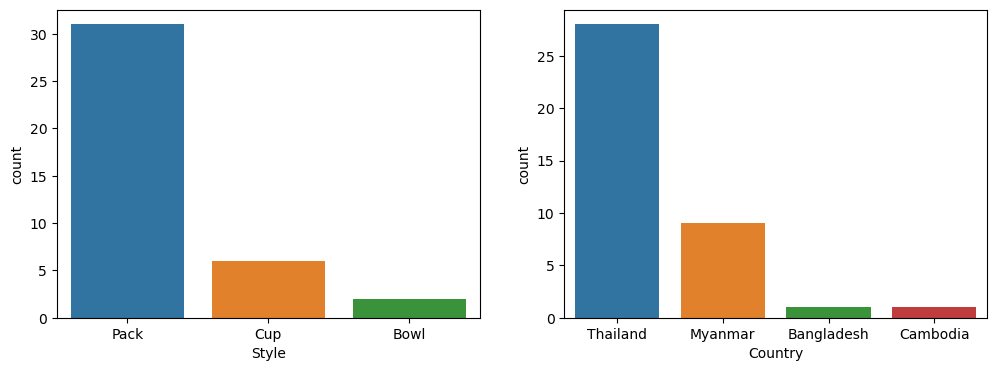

In [31]:
#распределение раменов бренда "МАМА" по типам упаковки и странам
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Style', data=df_mama, ax=axes[0], label = 'Country');
sns.countplot(x='Country', data=df_mama, ax=axes[1]);

In [32]:
df_mama2 = df_mama[['Country', 'Style']].\
           set_index('Country')

df_mama3 = df_mama2.groupby(by = 'Country').value_counts()
df_mama3

Country     Style
Bangladesh  Pack      1
Cambodia    Pack      1
Myanmar     Pack      8
            Cup       1
Thailand    Pack     21
            Cup       5
            Bowl      2
dtype: int64

In [33]:
#распределение раменов бренда "МАМА" по типам упаковки и странам
df_mama4 = pd.DataFrame({'Country': ['Bangladesh', 'Cambodia', 'Myanmar', 'Thailand']})
df_mama4['Pack'] = [1, 1, 8, 21]
df_mama4['Cup'] = [0, 0, 1, 5]
df_mama4['Bowl'] = [0, 0, 0, 2]

px.bar(df_mama4, x='Country', y=['Pack', 'Cup', 'Bowl'], title="MAMA Ramen")